<a href="https://colab.research.google.com/github/aniketDL/identify_apparel_hackathon/blob/master/Identify_Apparel_using_datablock_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Took part in the 'Identify The Apparel' hackathon created by Analytics Vidhya(Indian Kaggle). Current position in the leaderboard: 9th out off 236 participants**

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
cd train

/content/train


In [0]:
path = Path('/content')

In [0]:
data = ImageList.from_csv(path = path, folder='train', csv_name='train.csv',suffix='.png')

In [0]:
data 

ItemLists;

Train: ImageList (48000 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /content;

Valid: ImageList (12000 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /content;

Test: None

In [0]:
data = data.label_from_df(cols='label')

In [0]:
data4 = (ImageList.from_csv(path=path, folder='train',csv_name='train.csv',suffix='.png')
          .random_split_by_pct()
          .label_from_df(cols='label')
          .transform(get_transforms(),size = 28)
          .databunch()
        .normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
data4.c, data4.classes, len(data4.valid_ds), len(data4.train_ds)

(10, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 12000, 48000)

In [0]:
learn4 = cnn_learner(data4, models.resnet50, metrics = accuracy)

In [0]:
learn4.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.866558,0.688517,0.749750,02:03
1,0.625309,0.510605,0.812667,01:56
2,0.525095,0.433216,0.839583,01:56
3,0.509083,0.416887,0.843500,01:56


In [0]:
learn4.save('stage-01') # this saves the above model as 'stage-1'

In [0]:
learn4.unfreeze()

In [0]:
learn4.lr_find()
laern4.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


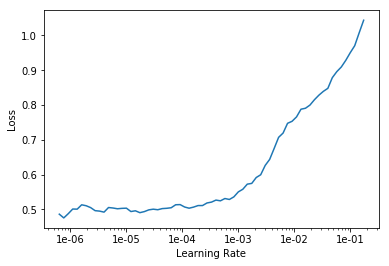

In [0]:
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(4,max_lr=slice(3e-06,5e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.461489,0.387601,0.855917,02:07
1,0.376615,0.313388,0.885833,02:08
2,0.336676,0.284876,0.893167,02:08
3,0.299240,0.275059,0.898583,02:09


In [0]:
 data5 = (ImageList.from_csv(path=path, folder='train',csv_name='train.csv',suffix='.png')
          .random_split_by_pct()
          .label_from_df(cols='label')
          .transform(get_transforms(),size = 64)
          .databunch()
        .normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
learn4.data = data5

In [0]:
learn4.freeze()

In [0]:
learn4.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


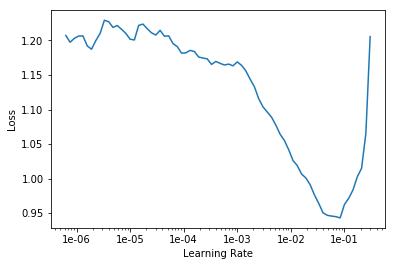

In [0]:
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(4,max_lr=slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.444553,0.322109,0.884333,02:26
1,0.339050,0.274324,0.901083,02:23
2,0.278416,0.212186,0.923000,02:22
3,0.254314,0.203754,0.926500,02:23


In [0]:
learn4.unfreeze()

In [0]:
learn4.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


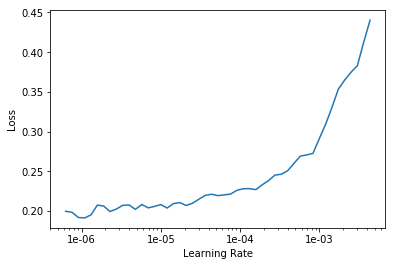

In [0]:
learn4.recorder.plot()

In [0]:
 data6 = (ImageList.from_csv(path=path, folder='train',csv_name='train.csv',suffix='.png')
          .random_split_by_pct()
          .label_from_df(cols='label')
          .transform(get_transforms(),size = 224)
          .databunch()
        .normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
learn4.data = data6

In [0]:
learn4.freeze()

In [0]:
learn4.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


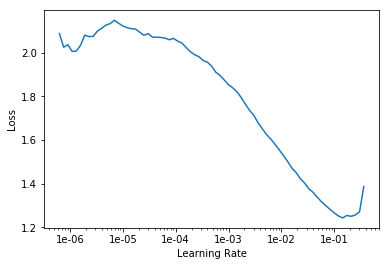

In [0]:
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(4,max_lr=slice(7e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.380533,0.297099,0.889167,13:11
1,0.299561,0.230166,0.914583,13:12
2,0.253457,0.194915,0.927583,13:13
3,0.214627,0.187159,0.932583,13:12


In [0]:
learn4.unfreeze()

In [0]:
learn4.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


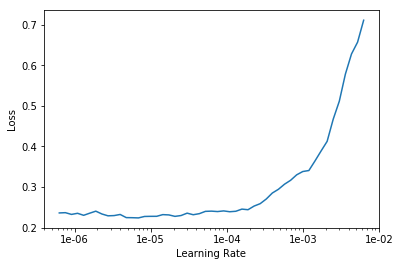

In [0]:
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(4,max_lr=slice(2e-05,1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.244553,0.216956,0.918250,17:22
1,0.198433,0.179666,0.933583,17:22
2,0.156565,0.148846,0.944333,17:22
3,0.132461,0.139898,0.948833,17:21


In [0]:
learn4.save('final-model')

In [0]:
test_images = ImageList.from_csv(path = path, folder='test', csv_name = 'test.csv', suffix='.png')

In [0]:
data6.add_test(test_images)

In [0]:
preds, _ = learn4.get_preds(ds_type = DatasetType.Test)

In [0]:
preds, targets = learn4.get_preds(DatasetType.Test)


In [0]:
labels = [np.argmax(p).data.item() for p in preds]

In [0]:
labels[:10]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [0]:
sub_df['label'] = labels[:]

In [0]:
sub_df.to_csv('submission_aniket.csv', index=False)